In [164]:
from Utils import *
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

# Lectura de los .csv resultantes después de pre-procesar la base datos

In [73]:
path3 = "~/PycharmProjects/AnalisisDatos/data/x_train.csv"
path4 = "~/PycharmProjects/AnalisisDatos/data/y_train.csv"
path5 = "~/PycharmProjects/AnalisisDatos/data/x_test.csv"
path6 = "~/PycharmProjects/AnalisisDatos/data/y_test.csv"

# Entrenamiento de 3 clasificadores
Al estandarizar los datos se requiere antes de segmentar el conjunto de datos en subconjuntos de prueba y entrenamiento. Por tanto, la extracción de características está basada en el subconjunto de entrenamiento. Así, podemos dedicarnos desde un principio a entrenar los modelos.
Como todas las clases están balanceadas, entonces mediremos el desempeño de nuestros modelos de clasificación usando accuracy_score. 

In [74]:
x_train = pd.read_csv(path3).drop(columns='Unnamed: 0')
x_test = pd.read_csv(path5).drop(columns='Unnamed: 0')
y_train = pd.read_csv(path4).drop(columns='Unnamed: 0').to_numpy().ravel()
y_test = pd.read_csv(path6).drop(columns='Unnamed: 0').to_numpy().ravel()

In [75]:
df_performance = pd.DataFrame(data=None, index=['logreg', 'random_frst', 'perceptron'], columns=['Base','PCA', 'K_PCA', 'K_Bests'])

## Regresión Logística



In [152]:
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [77]:
df_performance.loc['logreg', 'Base'] = accuracy_score(logreg.predict(x_test), y_test)

## Bosques Aleatorios

In [78]:
random_frst = RandomForestClassifier(n_estimators=100, random_state=42)
random_frst.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
df_performance.loc['random_frst', 'Base'] = accuracy_score(random_frst.predict(x_test), y_test)

## Perceptron

In [80]:
perceptron = Perceptron(max_iter=10000, random_state=42)
perceptron.fit(x_train, y_train)

Perceptron(max_iter=10000, random_state=42)

In [81]:
df_performance.loc['perceptron', 'Base'] = accuracy_score(perceptron.predict(x_test), y_test)

# Reducción de Características

## PCA : Principal Component Analysis

In [118]:
pca = PCA(n_components=34)
x_train_pca = pca.fit_transform(x_train)

In [119]:
logreg.fit(x_train_pca, y_train)
random_frst.fit(x_train_pca, y_train)
perceptron.fit(x_train_pca, y_train)

Perceptron(max_iter=10000, random_state=42)

In [120]:
x_test_pca = pca.transform(x_test)

In [121]:
df_performance.loc['logreg', 'PCA'] = accuracy_score(logreg.predict(x_test_pca), y_test)
df_performance.loc['random_frst', 'PCA'] = accuracy_score(random_frst.predict(x_test_pca), y_test)
df_performance.loc['perceptron', 'PCA'] = accuracy_score(perceptron.predict(x_test_pca), y_test)

## Kernel PCA

In [147]:
k_pca = KernelPCA(n_components=35)
x_train_pca_k = k_pca.fit_transform(x_train)
logreg.fit(x_train_pca_k, y_train)
random_frst.fit(x_train_pca_k, y_train)
perceptron.fit(x_train_pca_k, y_train)

Perceptron(max_iter=10000, random_state=42)

In [148]:
x_test_pca_k = k_pca.transform(x_test)
df_performance.loc['logreg','K_PCA'] = accuracy_score(logreg.predict(x_test_pca_k), y_test)
df_performance.loc['random_frst','K_PCA'] = accuracy_score(random_frst.predict(x_test_pca_k), y_test)
df_performance.loc['perceptron','K_PCA'] = accuracy_score(perceptron.predict(x_test_pca_k), y_test)

## Select K-Bests

In [135]:
k_bests = SelectKBest(score_func=f_classif, k=50)
x_train_k_bests = k_bests.fit_transform(x_train, y_train)
logreg.fit(x_train_k_bests, y_train)
random_frst.fit(x_train_k_bests, y_train)
perceptron.fit(x_train_k_bests, y_train)

Perceptron(max_iter=10000, random_state=42)

In [136]:
x_test_k_bests = k_bests.transform(x_test)
df_performance.loc['logreg', 'K_Bests'] = accuracy_score(logreg.predict(x_test_k_bests), y_test)
df_performance.loc['random_frst', 'K_Bests'] = accuracy_score(random_frst.predict(x_test_k_bests), y_test)
df_performance.loc['perceptron', 'K_Bests'] = accuracy_score(perceptron.predict(x_test_k_bests), y_test)

# Desempeño

In [150]:
df_performance

,Base,PCA,K_PCA,K_Bests
logreg,0.920789,0.932632,0.933158,0.930789
random_frst,0.951579,0.915789,0.914211,0.945
perceptron,0.86,0.911053,0.905526,0.888947


<Axes: >

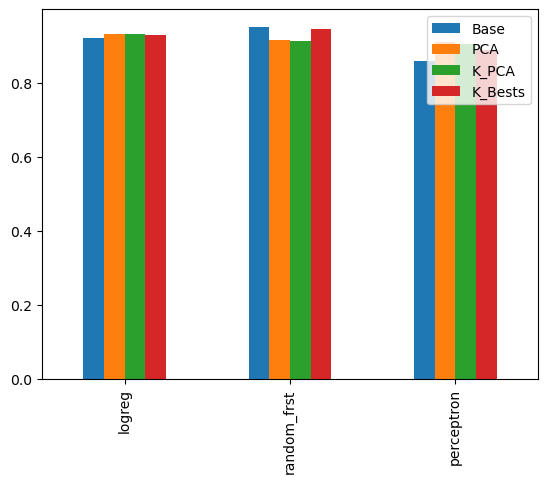

In [170]:
df_performance.plot(kind='bar')

# Matríz de confusión

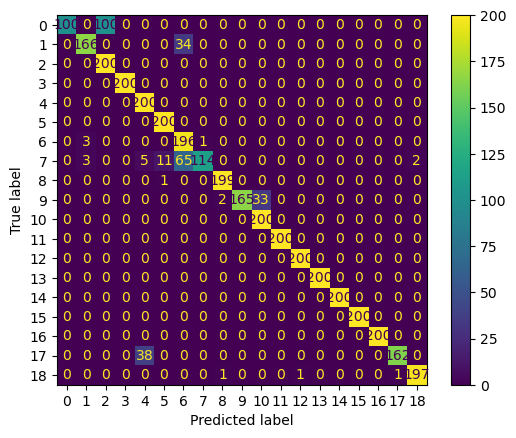

In [159]:
cm = confusion_matrix(y_test, logreg.predict(x_test))
dis = ConfusionMatrixDisplay(confusion_matrix = cm)
dis.plot()